In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp 

In [2]:
male_df = pd.read_csv('./fifa_2022/players_22.csv')

/Users/cnieto/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
male_df.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

In [4]:
male_df.shape

(19239, 110)

In [5]:
male_df.head(2)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png


### eliminamos columnas inutiles

#### 1 - eliminar columnas con url

In [6]:
male_df.drop(['player_face_url','player_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url'],axis=1,inplace=True)

In [7]:
for i in male_df.columns:
    if i.__contains__('url'):
        print(i)

In [8]:
for i in male_df.columns:
    print(i)

sofifa_id
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
club_team_id
club_name
league_name
league_level
club_position
club_jersey_number
club_loaned_from
club_joined
club_contract_valid_until
nationality_id
nationality_name
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_c

### usamos columna sofifa_id como indice del dataframe

In [9]:
male_df.set_index('sofifa_id',drop=True,inplace=True)

#### Resumen de abreviaciones de posiciones

GK - Goalkeeper

RB - Right Back

RWB - Right Wing Back

CB - Centre Back

LWB - Left Wing Back

LB - Left Back

CM - Centre Mid

CDM - Centre Defensive Mid

CAM - Centre Attacking Mid

RM - Right Mid

LM - Left Mid

LW - Left Wing

RW - Right Wing

CF - Centre Forward

LF - Left Forward

RF - Right Forward

ST - Striker



In [10]:
male_df[[
    'short_name','ls',
'st',
'rs',
'lw',
'lf',
'cf',
'rf',
'rw',
'lam',
'cam',
'ram',
'lm',
'lcm',
'cm',
'rcm',
'rm',
'lwb',
'ldm',
'cdm',
'rdm',
'rwb',
'lb',
'lcb',
'cb',
'rcb',
'rb',
'gk']]

,short_name,ls,st,rs,lw,lf,cf,rf,rw,lam,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,89+3,89+3,89+3,92,93,93,93,92,93,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
188545,R. Lewandowski,90+2,90+2,90+2,85,88,88,88,85,86+3,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
20801,Cristiano Ronaldo,90+1,90+1,90+1,88,89,89,89,88,86+3,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
190871,Neymar Jr,83+3,83+3,83+3,90,88,88,88,90,89+2,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
192985,K. De Bruyne,83+3,83+3,83+3,88,87,87,87,88,89+2,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261962,Song Defu,44+2,44+2,44+2,46,45,45,45,46,46+2,...,46+2,46+2,46+2,48+2,48+2,46+2,46+2,46+2,48+2,15+2
262040,C. Porter,45+2,45+2,45+2,47,46,46,46,47,47+2,...,46+2,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2
262760,N. Logue,45+2,45+2,45+2,46,46,46,46,46,47+2,...,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2


In [11]:
male_df[male_df.short_name=='L. Messi']

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3


#### crear nuevas columnas con "+" que contengan el numero añadido - PDTE 

### buscar todos los jugadores de una misma selección para comparar sus stats

### en nuestro caso: Francia

In [12]:
male_df[(male_df.short_name == 'K. Mbappé') | (male_df.short_name == "N. Kanté") |
       (male_df.short_name == "P. Pogba") | (male_df.short_name == "A. Griezmann") |
       (male_df.short_name == "K. Benzema") | (male_df.short_name == "O. Dembélé") |
       (male_df.short_name == "B. Pavard") | (male_df.short_name == "H. Lloris") |
       (male_df.short_name == "D. Upamecano")][['short_name','ls',
'st',
'rs',
'lw',
'lf',
'cf',
'rf',
'rw',
'lam',
'cam',
'ram',
'lm',
'lcm',
'cm',
'rcm',
'rm',
'lwb',
'ldm',
'cdm',
'rdm',
'rwb',
'lb',
'lcb',
'cb',
'rcb',
'rb',
'gk']]

,short_name,ls,st,rs,lw,lf,cf,rf,rw,lam,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
sofifa_id,,,,,,,,,,,,,,,,,,,,,
231747,K. Mbappé,89+3,89+3,89+3,90,90,90,90,90,89+3,...,63+3,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3
215914,N. Kanté,72+3,72+3,72+3,77,77,77,77,77,78+3,...,87+3,87+3,87+3,85+3,85+3,84+3,84+3,84+3,85+3,20+3
165153,K. Benzema,87+2,87+2,87+2,85,87,87,87,85,86+3,...,62+3,62+3,62+3,63+3,59+3,55+3,55+3,55+3,59+3,18+3
167948,H. Lloris,31+3,31+3,31+3,33,34,34,34,33,38+3,...,38+3,38+3,38+3,35+3,34+3,30+3,30+3,30+3,34+3,85+2
195864,P. Pogba,82+3,82+3,82+3,82,83,83,83,82,85+2,...,78+3,78+3,78+3,74+3,72+3,72+3,72+3,72+3,72+3,13+3
194765,A. Griezmann,84+1,84+1,84+1,85,86-1,86-1,86-1,85,86-1,...,69+3,69+3,69+3,71+3,69+3,63+3,63+3,63+3,69+3,21+3
231443,O. Dembélé,76+3,76+3,76+3,83,81,81,81,83,81+3,...,58+3,58+3,58+3,63+3,59+3,47+3,47+3,47+3,59+3,17+3
229558,D. Upamecano,62+2,62+2,62+2,63,63,63,63,63,64+2,...,76+2,76+2,76+2,74+2,76+2,82+2,82+2,82+2,76+2,17+2
226851,B. Pavard,66+3,66+3,66+3,67,66,66,66,67,68+3,...,76+3,76+3,76+3,76+3,77+3,77+3,77+3,77+3,77+3,17+3


In [13]:
male_21_df = pd.read_csv('./fifa_2022/players_21.csv')

In [14]:
male_21_df[(male_21_df.short_name == 'K. Mbappé') | (male_21_df.short_name == "N. Kanté") |
       (male_21_df.short_name == "P. Pogba") | (male_21_df.short_name == "A. Griezmann") |
       (male_21_df.short_name == "K. Benzema") | (male_21_df.short_name == "O. Dembélé") |
       (male_21_df.short_name == "B. Pavard") | (male_21_df.short_name == "H. Lloris") |
       (male_21_df.short_name == "D. Upamecano")][['short_name','ls',
'st',
'rs',
'lw',
'lf',
'cf',
'rf',
'rw',
'lam',
'cam',
'ram',
'lm',
'lcm',
'cm',
'rcm',
'rm',
'lwb',
'ldm',
'cdm',
'rdm',
'rwb',
'lb',
'lcb',
'cb',
'rcb',
'rb',
'gk']]

,short_name,ls,st,rs,lw,lf,cf,rf,rw,lam,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
11,K. Mbappé,88+3,88+3,88+3,89,89,89,89,89,87+3,...,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3,18+3
14,K. Benzema,86+3,86+3,86+3,85,87,87,87,85,86+3,...,63+3,63+3,63+3,63+3,59+3,55+3,55+3,55+3,59+3,18+3
27,N. Kanté,72+3,72+3,72+3,77,77,77,77,77,79+3,...,86+2,86+2,86+2,85+3,84+3,83+3,83+3,83+3,84+3,20+3
29,H. Lloris,31+3,31+3,31+3,32,33,33,33,32,35+3,...,37+3,37+3,37+3,35+3,34+3,30+3,30+3,30+3,34+3,85+2
38,A. Griezmann,85+2,85+2,85+2,86,86,86,86,86,86+1,...,71+3,71+3,71+3,73+3,70+3,65+3,65+3,65+3,70+3,21+3
57,P. Pogba,82+3,82+3,82+3,82,83,83,83,82,84+3,...,78+3,78+3,78+3,76+3,74+3,73+3,73+3,73+3,74+3,13+3
209,O. Dembélé,76+3,76+3,76+3,83,81,81,81,83,81+3,...,58+3,58+3,58+3,63+3,59+3,47+3,47+3,47+3,59+3,17+3
343,B. Pavard,66+2,66+2,66+2,68,67,67,67,68,69+2,...,79+2,79+2,79+2,78+2,79+2,80+2,80+2,80+2,79+2,18+2
644,D. Upamecano,60+2,60+2,60+2,60,60,60,60,60,62+2,...,74+2,74+2,74+2,70+2,72+2,79+2,79+2,79+2,72+2,16+2


### DESCR de columnas
- short_name object
- long_name object
- player_positions object
- overall int64
- potential int64
- value_eur float64
- wage_eur float64
- age int64
- dob object
- height_cm int64
- weight_kg int64
- club_team_id float64
- club_name object
- league_name object
- league_level float64
- club_position object
- club_jersey_number float64
- club_loaned_from object
- club_joined object
- club_contract_valid_until float64
- nationality_id int64
- nationality_name object
- nation_team_id float64
- nation_position object
- nation_jersey_number float64
- preferred_foot object
- weak_foot int64
- skill_moves int64
- international_reputation int64
- work_rate object
- body_type object
- real_face object
- release_clause_eur float64
- player_tags object
- player_traits object
- pace float64
- shooting float64
- passing float64
- dribbling float64
- defending float64
- physic float64
- attacking_crossing int64
- attacking_finishing int64
- attacking_heading_accuracy int64
- attacking_short_passing int64
- attacking_volleys int64
- skill_dribbling int64
- skill_curve int64
- skill_fk_accuracy int64
- skill_long_passing int64
- skill_ball_control int64
- movement_acceleration int64
- movement_sprint_speed int64
- movement_agility int64
- movement_reactions int64
- movement_balance int64
- power_shot_power int64
- power_jumping int64
- power_stamina int64
- power_strength int64
- power_long_shots int64
- mentality_aggression int64
- mentality_interceptions int64
- mentality_positioning int64
- mentality_vision int64
- mentality_penalties int64
- mentality_composure int64
- defending_marking_awareness int64
- defending_standing_tackle int64
- defending_sliding_tackle int64
- goalkeeping_diving int64
- goalkeeping_handling int64
- goalkeeping_kicking int64
- goalkeeping_positioning int64
- goalkeeping_reflexes int64
- goalkeeping_speed float64

In [15]:
for i,j in male_df.dtypes.iteritems():
    print(i,j)

short_name object
long_name object
player_positions object
overall int64
potential int64
value_eur float64
wage_eur float64
age int64
dob object
height_cm int64
weight_kg int64
club_team_id float64
club_name object
league_name object
league_level float64
club_position object
club_jersey_number float64
club_loaned_from object
club_joined object
club_contract_valid_until float64
nationality_id int64
nationality_name object
nation_team_id float64
nation_position object
nation_jersey_number float64
preferred_foot object
weak_foot int64
skill_moves int64
international_reputation int64
work_rate object
body_type object
real_face object
release_clause_eur float64
player_tags object
player_traits object
pace float64
shooting float64
passing float64
dribbling float64
defending float64
physic float64
attacking_crossing int64
attacking_finishing int64
attacking_heading_accuracy int64
attacking_short_passing int64
attacking_volleys int64
skill_dribbling int64
skill_curve int64
skill_fk_accuracy in

In [16]:
male_df.drop(['long_name'],axis=1)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
188545,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
20801,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
190871,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
192985,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,70,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261962,Song Defu,CDM,47,52,70000.0,1000.0,22,1999-01-02,180,64,...,46+2,46+2,46+2,48+2,48+2,46+2,46+2,46+2,48+2,15+2
262040,C. Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,70,...,46+2,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2
262760,N. Logue,CM,47,55,100000.0,500.0,21,2000-02-07,178,72,...,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2


#### buscar relación entre potential y overall. Predicción de quien puede mejorar PDTE

In [17]:
male_df[['potential','overall']]

,potential,overall
sofifa_id,,
158023,93,93
188545,92,92
20801,91,91
190871,91,91
192985,91,91
...,...,...
261962,52,47
262040,59,47
262760,55,47


In [18]:
male_df[['short_name','value_eur','wage_eur']]

,short_name,value_eur,wage_eur
sofifa_id,,,
158023,L. Messi,78000000.0,320000.0
188545,R. Lewandowski,119500000.0,270000.0
20801,Cristiano Ronaldo,45000000.0,270000.0
190871,Neymar Jr,129000000.0,270000.0
192985,K. De Bruyne,125500000.0,350000.0
...,...,...,...
261962,Song Defu,70000.0,1000.0
262040,C. Porter,110000.0,500.0
262760,N. Logue,100000.0,500.0


In [19]:
#comentario random

### revisar csv career

In [20]:
df_career = pd.read_excel('./fifa_2022/Career Mode player datasets - FIFA 15-22.xlsx')

In [21]:
df_career.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,27,...,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,29,...,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,...,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,32,...,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1363/60.png,https://cdn.sofifa.net/flags/se.png
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,300000.0,28,...,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png


In [22]:
df_career.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: datetime64[ns](2), float64(17), int64(43), object(48)
memory usage: 13.6+ MB


In [23]:
colu = df_career.columns

In [24]:
for i in colu:
    print(i)

sofifa_id
player_url
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
club_team_id
club_name
league_name
league_level
club_position
club_jersey_number
club_loaned_from
club_joined
club_contract_valid_until
nationality_id
nationality_name
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties


In [25]:
len(male_df.columns)

103

In [26]:
rows = [26,51,76,103]

In [27]:
collaborators = ['gerard','kseniya','akram','adriana']

In [28]:
row = 0
for i in rows:
    p = np.random.choice(collaborators)
    collaborators.remove(p)
    print(f'{p} has to do rows from {row} to {i}')
    row = i

kseniya has to do rows from 0 to 26
gerard has to do rows from 26 to 51
adriana has to do rows from 51 to 76
akram has to do rows from 76 to 103


### columns from 0 to 26

In [32]:
male_df.iloc[:,:26]

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,...,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left
188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,...,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right
20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,...,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right
190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,...,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right
192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,...,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,RCM,7.0,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261962,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,1999-01-02,180,...,36.0,NaN,2021-04-01,2021.0,155,China PR,NaN,NaN,NaN,Right
262040,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,...,27.0,NaN,2021-02-22,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right
262760,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,2000-02-07,178,...,31.0,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right


In [33]:
# drop column 1 : Long_name
# reason: we keep just short name (column 0)

In [35]:
male_df.drop('long_name',axis=1, inplace=True)

In [36]:
# modify column 2: player_positions
# modification: keep only one position, making it easy to work with categorical ML

In [39]:
male_df.player_positions = male_df.player_positions.apply(lambda x: x.split(',')[0])

In [42]:
# keep columns 3,4 without changes
# reason: these are numerical columns with int64 type

In [41]:
male_df[['overall','potential']].dtypes

overall      int64
potential    int64
dtype: object

In [ ]:
# comment on column 5
# value_eur has an adequate format (float64) but seems to be highly skewed
# most players value fall on the first bins (between 0 and 250000)

In [45]:
len(male_df.value_eur.unique())

253

<AxesSubplot:>

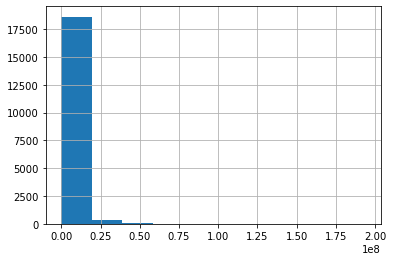

In [52]:
male_df.value_eur.hist()

<AxesSubplot:xlabel='value_eur', ylabel='Count'>

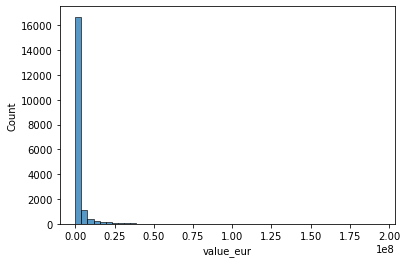

In [76]:
sns.histplot(data=male_df,x='value_eur',bins=50)

In [99]:
from scipy.stats import kstest

z,p = kstest(male_df.value_eur, 'norm', alternative='less')
print(p < 0.05)

False


In [63]:
male_df.value_eur.quantile([.25, .5, .75])

0.25     475000.0
0.50     975000.0
0.75    2000000.0
Name: value_eur, dtype: float64

In [87]:
count = 0
listofeur = []
for i,j in male_df.value_eur.iteritems():
    listofeur.append(j)
    count += 1
    if count == 10:
        break
     

In [90]:
listofeur[0] + 1

78000001.0

In [94]:
male_df.value_eur.nlargest(10)

sofifa_id
231747    194000000.0
239085    137500000.0
202126    129500000.0
190871    129000000.0
192985    125500000.0
188545    119500000.0
230621    119500000.0
228702    119500000.0
233049    116500000.0
231281    114000000.0
Name: value_eur, dtype: float64

<AxesSubplot:>

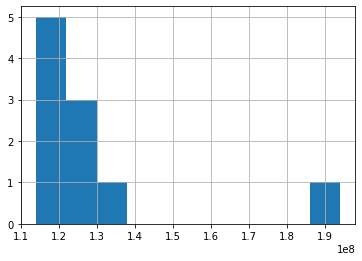

In [95]:
male_df.value_eur.nlargest(10).hist()

In [92]:
male_df.value_eur.nsmallest(10)

sofifa_id
245558     9000.0
102881    15000.0
166713    15000.0
183031    15000.0
138431    15000.0
149697    15000.0
157190    15000.0
140300    20000.0
186838    20000.0
232473    20000.0
Name: value_eur, dtype: float64

<AxesSubplot:>

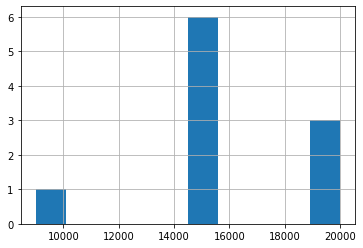

In [96]:
male_df.value_eur.nsmallest(10).hist()